In [79]:
'''
@author: EDA - Cheng Jiang
         Modelling - Rahul Nair
'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats.mstats import winsorize
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')

In [80]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [81]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [82]:
df.shape

(2938, 22)

In [83]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [84]:
# Rename column names to uniform the format
df.rename(columns = {" BMI " :"BMI",
                     "Life expectancy ": "Life_Expectancy",
                     "Adult Mortality":"Adult_Mortality",
                     "infant deaths":"Infant_Deaths",
                     "percentage expenditure":"Percentage_Expenditure",
                     "Hepatitis B":"HepatitisB",
                     "Measles ":"Measles",
                     "under-five deaths ": "Under_Five_Deaths",
                     "Total expenditure":"Total_Expenditure",
                     "Diphtheria ": "Diphtheria",
                     " thinness  1-19 years":"Thinness_1-19_Years",
                     " thinness 5-9 years":"Thinness_5-9_Years",
                     " HIV/AIDS":"HIV/AIDS",
                     "Income composition of resources":"Income_Composition_Of_Resources"}, inplace = True)

In [85]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19_Years',
       'Thinness_5-9_Years', 'Income_Composition_Of_Resources', 'Schooling'],
      dtype='object')

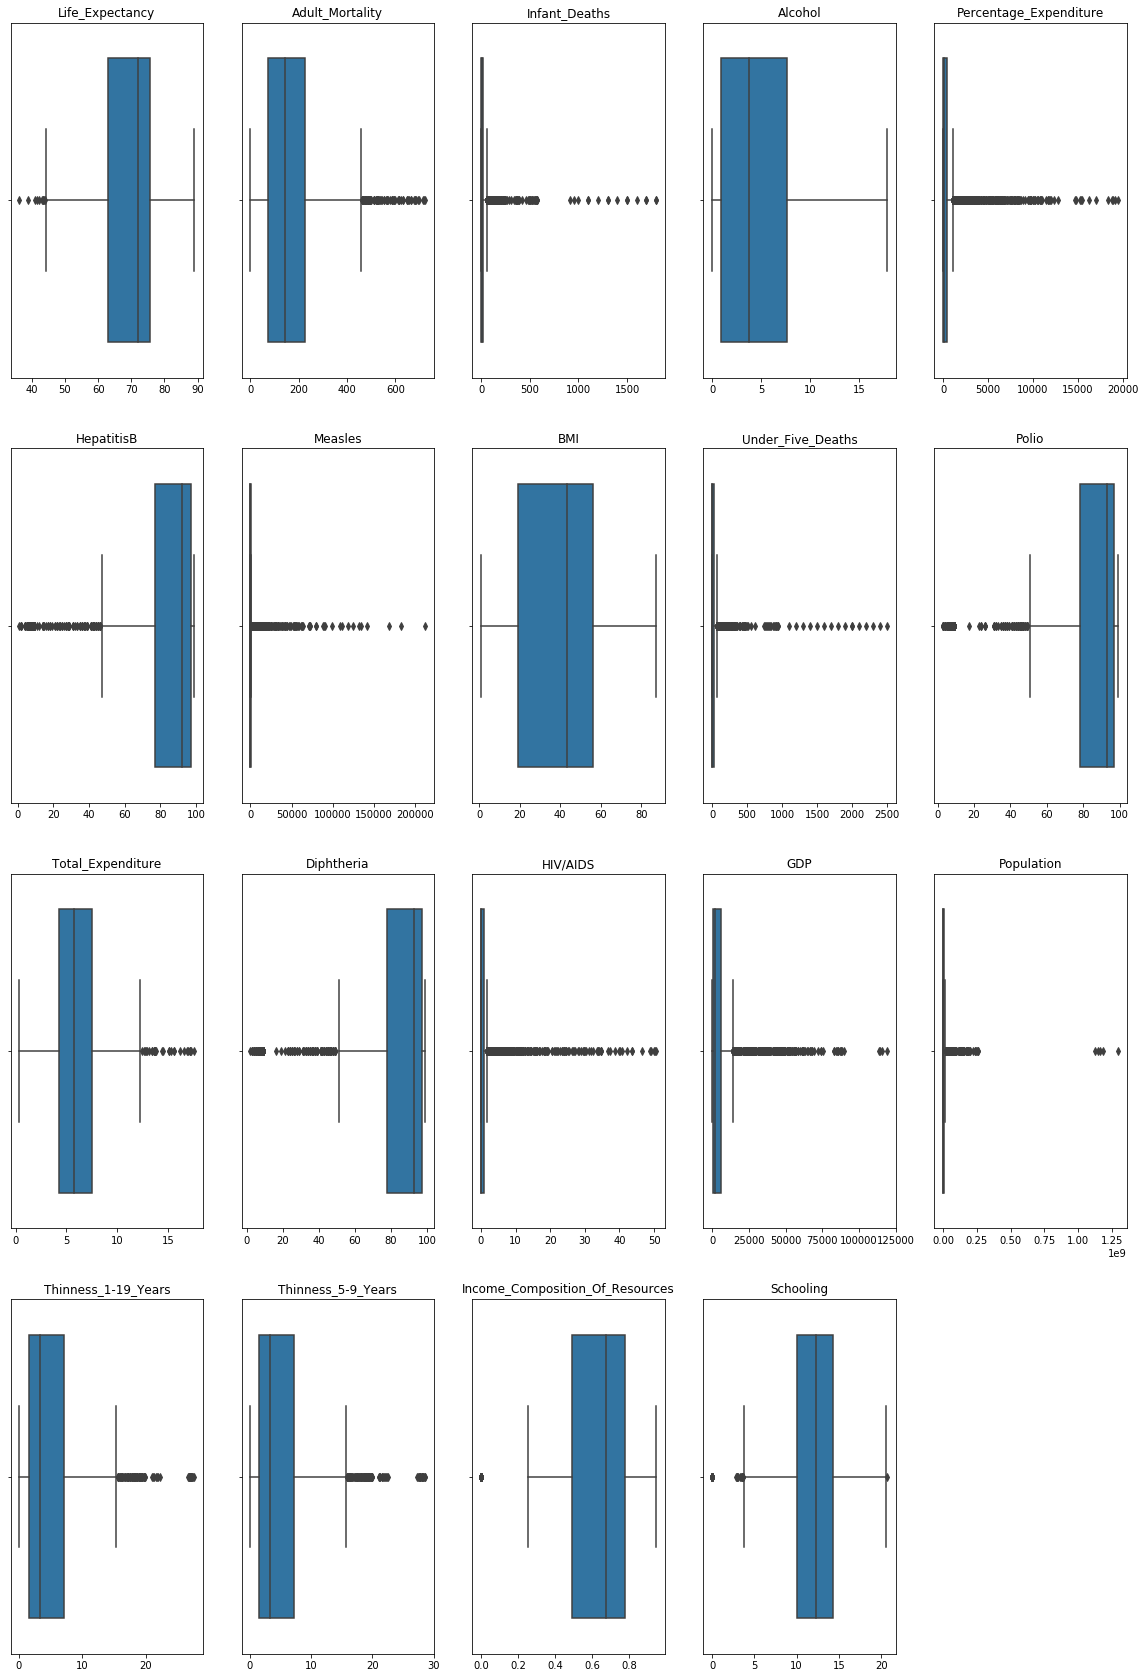

In [86]:
# =============================================================================
# Dealing with Outliers
# =============================================================================
# Check outliers
col_dict = {'Life_Expectancy':1,
            'Adult_Mortality':2,
            'Infant_Deaths':3,
            'Alcohol':4,
            'Percentage_Expenditure':5,
            'HepatitisB':6,
            'Measles':7,
            'BMI':8,
            'Under_Five_Deaths':9,
            'Polio':10,
            'Total_Expenditure':11,
            'Diphtheria':12,
            'HIV/AIDS':13,
            'GDP':14,
            'Population':15,
            'Thinness_1-19_Years':16,
            'Thinness_5-9_Years':17,
            'Income_Composition_Of_Resources':18,
            'Schooling':19}

plt.figure(figsize=(20,30))
for col, i in col_dict.items():
    plt.subplot(4,5,i)
    sns.boxplot(df[col]).set(xlabel=None)
    plt.title(col)
plt.show()

In [87]:
# Dealing with outliers by deleting unrealistic data
df = df[df['Infant_Deaths'] < 1001]
df = df[df['Under_Five_Deaths'] < 1001]
df = df[df['Measles'] < 1001]


# Count Outliers
def OutlierCounter(col):
    print(15*'-' + col + 15*'-')
    q25, q75 = np.nanquantile(df[col], [.25,.75])
    IQR = q75-q25
    minval = q25 - (1.5*IQR)
    maxval = q75 + (1.5*IQR)
    outlier_count = len(np.where((df[col] > maxval) | (df[col] < minval))[0])
    outlier_percent = round(outlier_count / len(df[col]*100),2)
    print("Outlier Counts: {}".format(outlier_count))
    print("Outlier Percentage: {}".format(outlier_percent))
    
    
cont_vars = df.columns[3:]  
for cols in cont_vars:
    OutlierCounter(cols)

---------------Life_Expectancy---------------
Outlier Counts: 65
Outlier Percentage: 0.03
---------------Adult_Mortality---------------
Outlier Counts: 86
Outlier Percentage: 0.04
---------------Infant_Deaths---------------
Outlier Counts: 323
Outlier Percentage: 0.13
---------------Alcohol---------------
Outlier Counts: 0
Outlier Percentage: 0.0
---------------Percentage_Expenditure---------------
Outlier Counts: 326
Outlier Percentage: 0.14
---------------HepatitisB---------------
Outlier Counts: 226
Outlier Percentage: 0.09
---------------Measles---------------
Outlier Counts: 391
Outlier Percentage: 0.16
---------------BMI---------------
Outlier Counts: 0
Outlier Percentage: 0.0
---------------Under_Five_Deaths---------------
Outlier Counts: 367
Outlier Percentage: 0.15
---------------Polio---------------
Outlier Counts: 245
Outlier Percentage: 0.1
---------------Total_Expenditure---------------
Outlier Counts: 29
Outlier Percentage: 0.01
---------------Diphtheria---------------
Ou

### We will winsorizing to handle the outliers

In [88]:
#winsorize the data
df_clean = pd.DataFrame()
df_clean = df[["Country", "Year", "Status"]].copy()
df_clean[cont_vars[0]] = winsorize(df[cont_vars[0]], (0.03,0))  
df_clean[cont_vars[1]] = winsorize(df[cont_vars[1]], (0,0.04))  
df_clean[cont_vars[2]] = winsorize(df[cont_vars[2]], (0,0.15))  
df_clean[cont_vars[3]] = winsorize(df[cont_vars[3]], (0,0))  
df_clean[cont_vars[4]] = winsorize(df[cont_vars[4]], (0,0.14))  
df_clean[cont_vars[5]] = winsorize(df[cont_vars[5]], (0.1,0))  
df_clean[cont_vars[6]] = winsorize(df[cont_vars[6]], (0,0.17))  
df_clean[cont_vars[7]] = winsorize(df[cont_vars[7]], (0,0))  
df_clean[cont_vars[8]] = winsorize(df[cont_vars[8]], (0,0.16))  
df_clean[cont_vars[9]] = winsorize(df[cont_vars[9]], (0.11,0)) 
df_clean[cont_vars[10]] = winsorize(df[cont_vars[10]], (0.01,0))
df_clean[cont_vars[11]] = winsorize(df[cont_vars[11]], (0.11,0))
df_clean[cont_vars[12]] = winsorize(df[cont_vars[12]], (0,0.21))   
df_clean[cont_vars[13]] = winsorize(df[cont_vars[13]], (0,0.12))  
df_clean[cont_vars[14]] = winsorize(df[cont_vars[14]], (0,0.1))  
df_clean[cont_vars[15]] = winsorize(df[cont_vars[15]], (0,0.04))  
df_clean[cont_vars[16]] = winsorize(df[cont_vars[16]], (0,0.04))
df_clean[cont_vars[17]] = winsorize(df[cont_vars[17]], (0.05,0))
df_clean[cont_vars[18]] = winsorize(df[cont_vars[18]], (0.017,0.05))

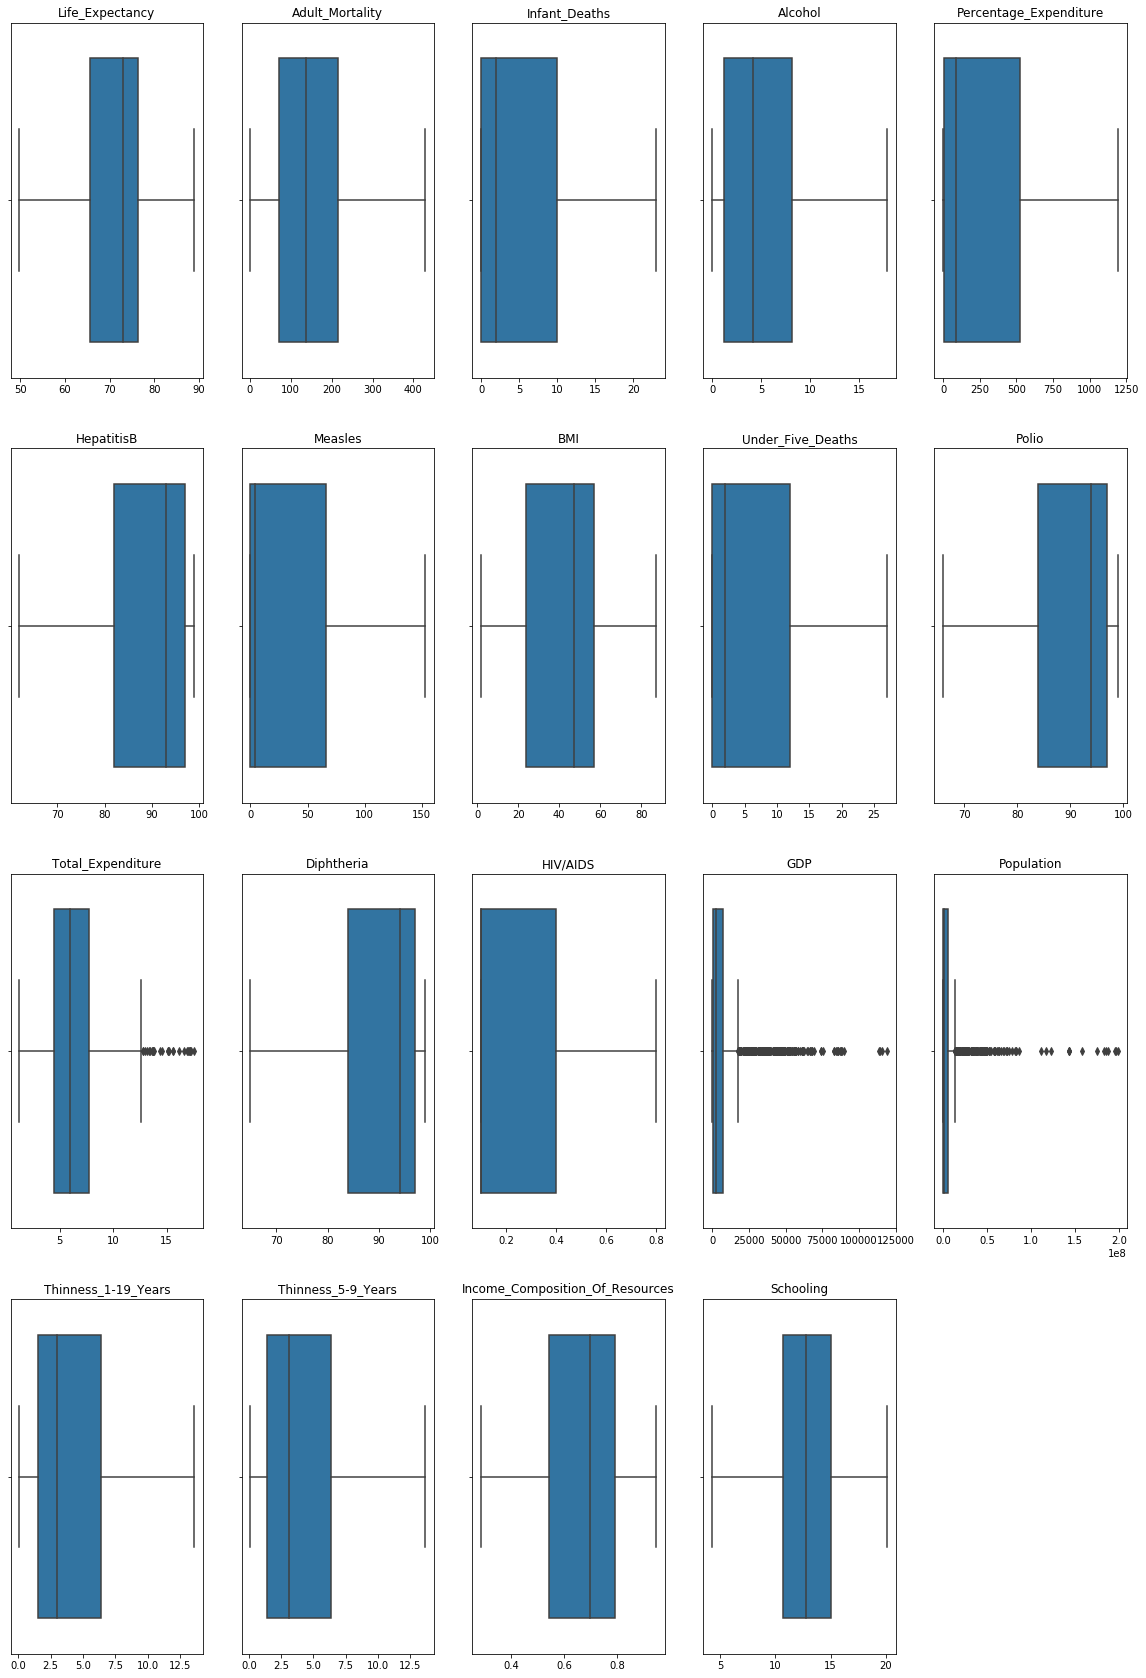

In [89]:
#plot the data after winsorized
plt.figure(figsize=(20,30))
for col, i in col_dict.items():
    plt.subplot(4,5,i)
    sns.boxplot(df_clean[col]).set(xlabel=None)
    plt.title(col)
plt.show()

### We see that the winsorizing didn't have much effect on Total_Expenditure, Population and GDP, so we will run a log transformation on them

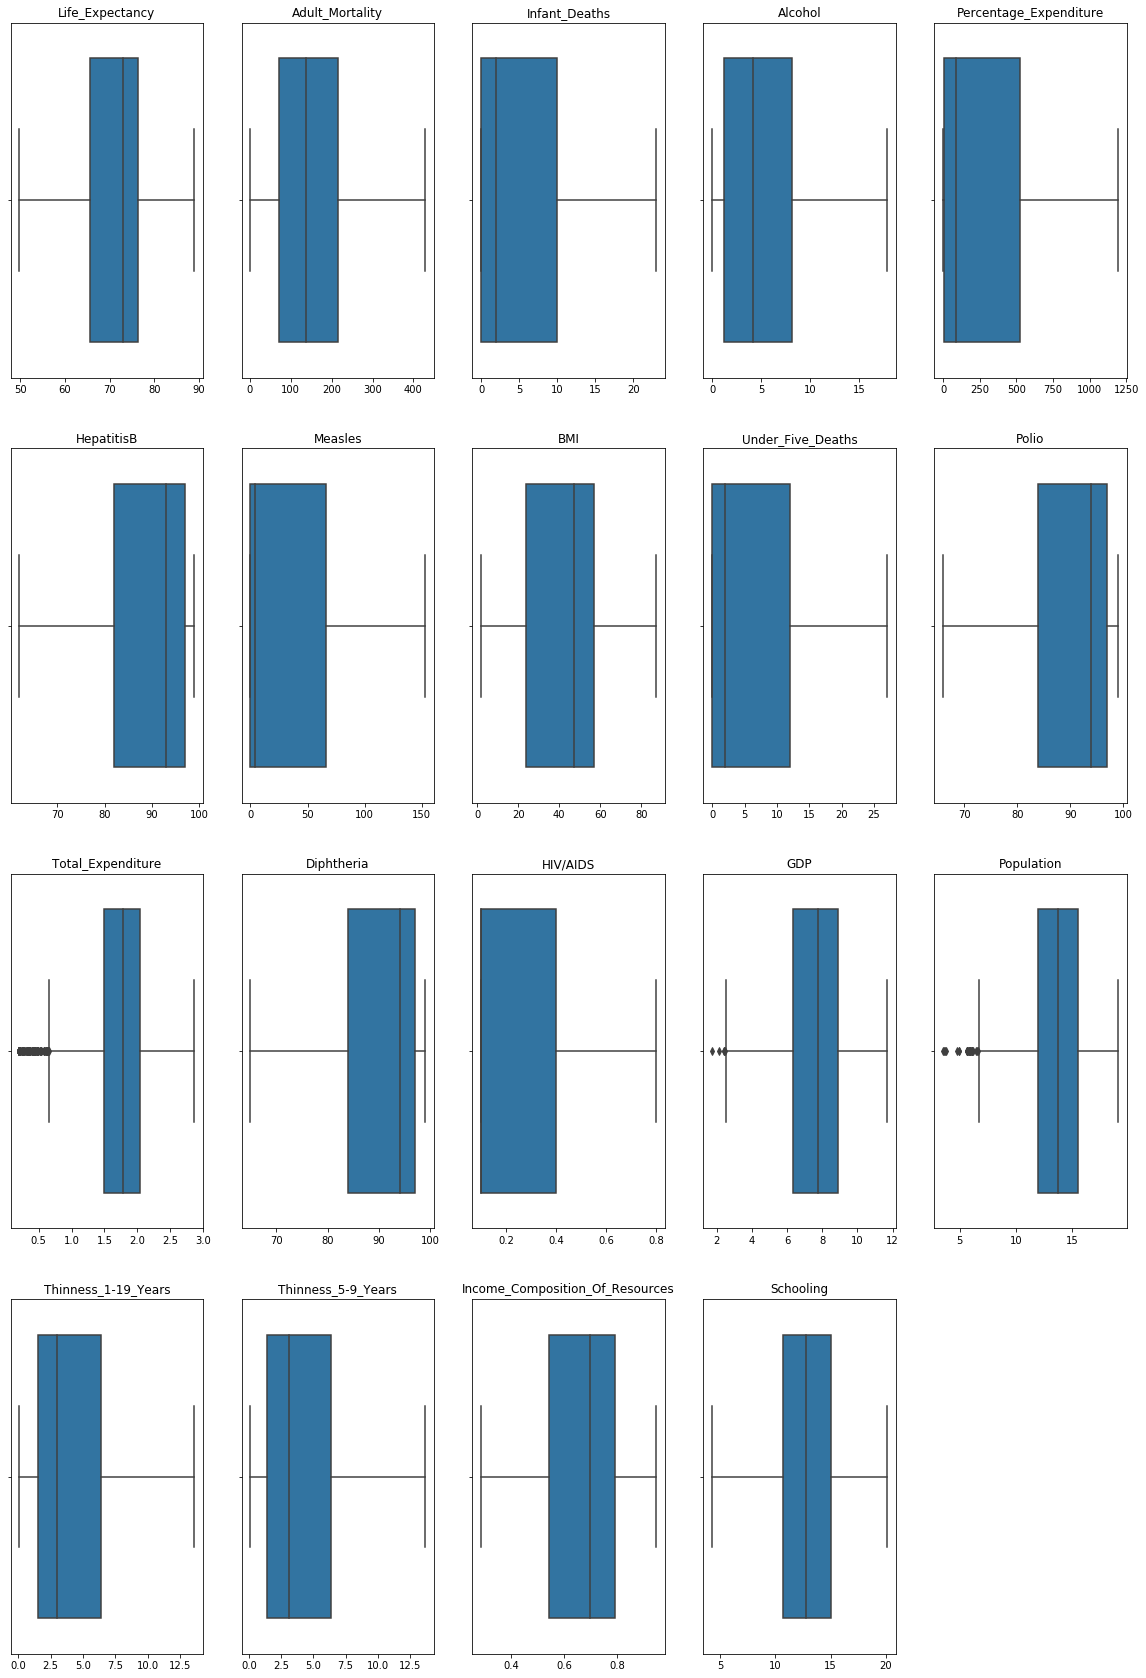

In [90]:
#Run log transformation on Total_Expenditure, Population and GDP
df_clean['Total_Expenditure'] = np.log(df_clean['Total_Expenditure'])
df_clean['GDP'] = np.log(df_clean['GDP'])
df_clean['Population'] = np.log(df_clean['Population']) 
plt.figure(figsize=(20,30))
for col, i in col_dict.items():
    plt.subplot(4,5,i)
    sns.boxplot(df_clean[col]).set(xlabel=None)
    plt.title(col)
plt.show()

### The data seems to have improved a little bit

In [91]:
# =============================================================================
# Dealing with missing values
# =============================================================================
print(df_clean.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                      0
Infant_Deaths                        0
Alcohol                            170
Percentage_Expenditure               0
HepatitisB                         403
Measles                              0
BMI                                 22
Under_Five_Deaths                    0
Polio                               19
Total_Expenditure                  190
Diphtheria                          19
HIV/AIDS                             0
GDP                                361
Population                         557
Thinness_1-19_Years                  0
Thinness_5-9_Years                   0
Income_Composition_Of_Resources    114
Schooling                            0
dtype: int64


In [92]:
imputed_data = []
for year in list(df_clean.Year.unique()):
    year_data = df_clean[df_clean.Year == year].copy()
    for col in list(year_data.columns)[4:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().median()).copy()
    imputed_data.append(year_data)
df_clean = pd.concat(imputed_data).copy()

df_clean = df_clean[df_clean.Life_Expectancy.notnull()]

print(df_clean.isnull().sum())

Country                            0
Year                               0
Status                             0
Life_Expectancy                    0
Adult_Mortality                    0
Infant_Deaths                      0
Alcohol                            0
Percentage_Expenditure             0
HepatitisB                         0
Measles                            0
BMI                                0
Under_Five_Deaths                  0
Polio                              0
Total_Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness_1-19_Years                0
Thinness_5-9_Years                 0
Income_Composition_Of_Resources    0
Schooling                          0
dtype: int64


## EDA

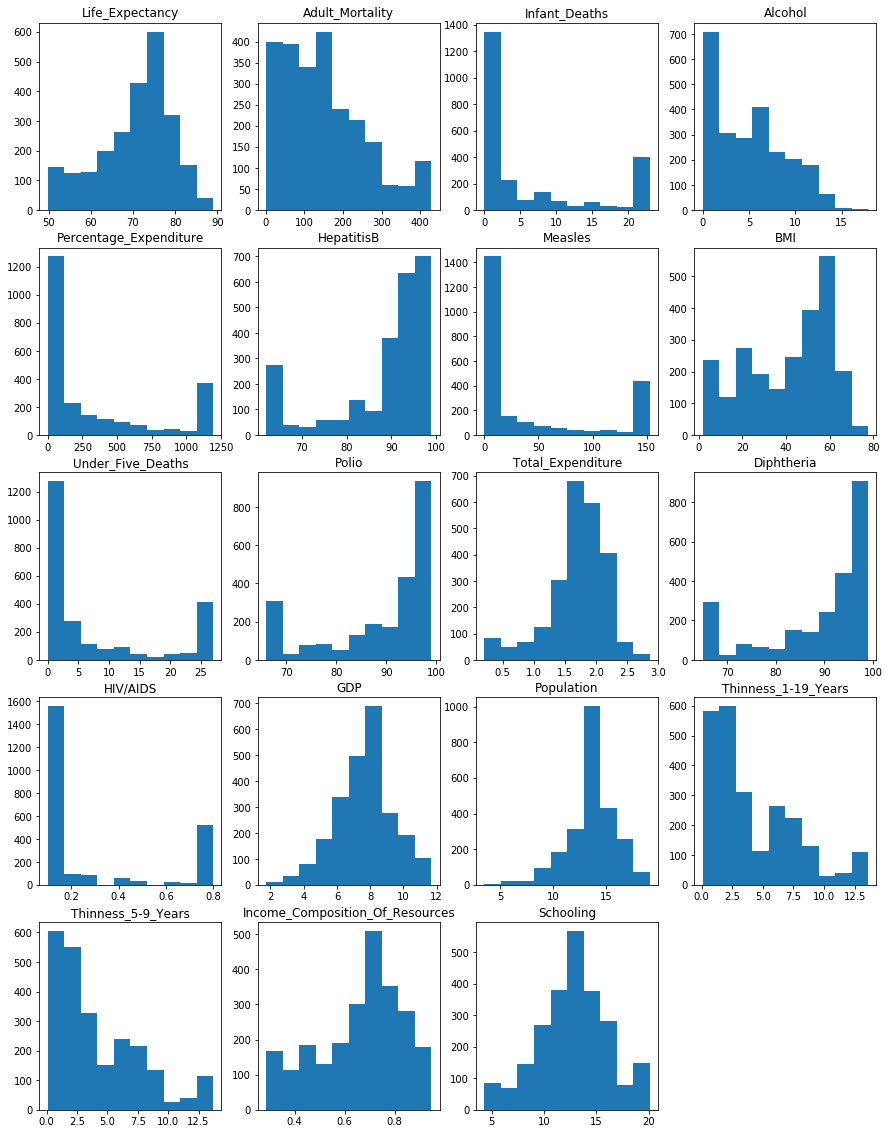

In [93]:
# Histogram
plt.figure(figsize=(15, 20))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(df_clean.iloc[:,3:][col])
    plt.title(col)


(array([ 12.,  10.,  14.,  59., 175., 123., 190., 533., 803., 484.]),
 array([0.        , 0.60614569, 1.21229138, 1.81843708, 2.42458277,
        3.03072846, 3.63687415, 4.24301984, 4.84916554, 5.45531123,
        6.06145692]),
 <a list of 10 Patch objects>)

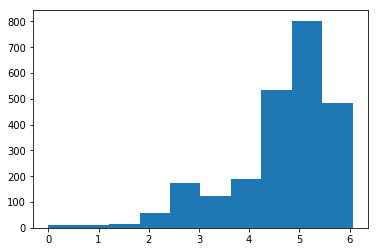

In [94]:
plt.hist(np.log(df_clean['Adult_Mortality']))

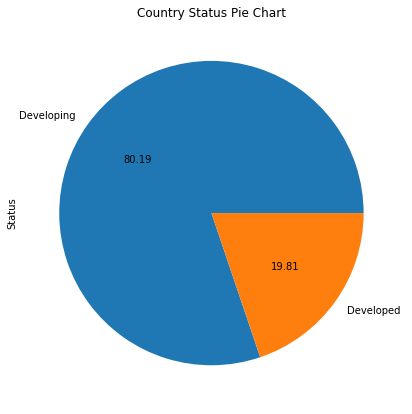

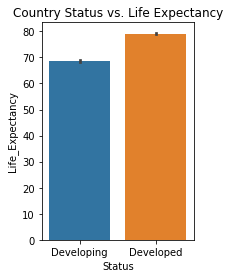

In [95]:
# Status
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
df_clean.Status.value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Country Status Pie Chart')
plt.show()
plt.subplot(1,2,2)
sns.barplot(x="Status", y="Life_Expectancy", data=df_clean)
plt.title("Country Status vs. Life Expectancy")
plt.show()

#### Most of the data is coming from developing countries and the life expectancy seems to be more in Developed countries. It does make sense as developed countries have better medical facilties to take care of citizen's health.

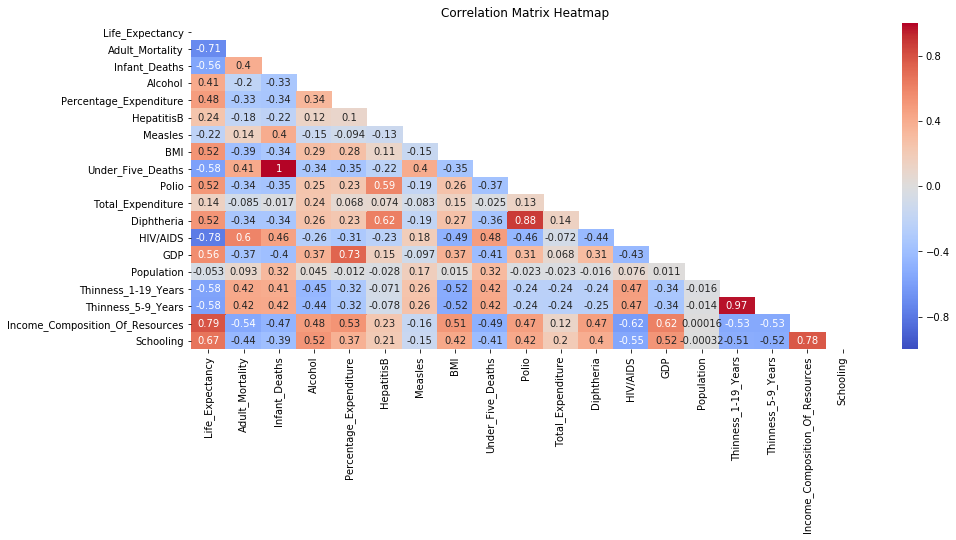

In [96]:
#Correlations
corrmat = df_clean.iloc[:,3:].corr()
mask = np.triu(df_clean.iloc[:,3:].corr())
plt.figure(figsize=(15,6))
sns.heatmap(corrmat, annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Factors like Income_Composition_of_Resources, HIV/AIDS are highly correlated to the target variable (Life_Expectancy). Apart from that, we see some high correlations among the variables as well such as Diphtheria~Polio (0.88), GDP~Percentage_Expenditure (0.73), Schooling~Income_Composition_of_Resources (0.78) and Thinness_1-19_years~Thinness_5-9_years (0.97) which is pretty high.

## Modelling 

### Now we got an insight of the data doing EDA, we will start preparing the data for modelling.

#### We see that the data contains two variables (Country and Status) of 'object' datatype. So, we will create dummy variables for them.

In [97]:
country_dummies = pd.get_dummies(df_clean['Country'])
status_dummies = pd.get_dummies(df_clean['Status'])

In [98]:
df_clean.drop(['Country','Status'],inplace=True,axis=1)
df_clean = pd.concat([df_clean,country_dummies,status_dummies],axis=1)

In [99]:
df_clean

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,BMI,Under_Five_Deaths,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developed,Developing
1,2014,59.9,271.0,23,0.01,73.523582,62.0,153,18.6,27,...,0,0,0,0,0,0,0,0,0,1
17,2014,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,1,...,0,0,0,0,0,0,0,0,0,1
33,2014,75.4,11.0,21,0.01,54.237318,95.0,0,58.4,24,...,0,0,0,0,0,0,0,0,0,1
65,2014,76.2,131.0,0,8.56,1192.696619,99.0,0,47.0,0,...,0,0,0,0,0,0,0,0,0,1
81,2014,76.2,118.0,8,7.93,847.371746,94.0,1,62.2,9,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,2000,75.1,131.0,1,6.65,645.958382,92.0,0,55.0,1,...,1,0,0,0,0,0,0,0,0,1
2841,2000,67.1,189.0,23,1.60,48.509417,89.0,80,34.8,27,...,0,1,0,0,0,0,0,0,0,1
2857,2000,69.0,18.0,0,1.21,21.900752,62.0,9,41.1,0,...,0,0,1,0,0,0,0,0,0,1
2873,2000,72.5,168.0,11,8.01,0.000000,62.0,22,53.4,13,...,0,0,0,1,0,0,0,0,0,1


In [100]:
# storing the cleaned data for further use
df_clean.to_csv('cleaned_data.csv')

### Now we will do some feature scaling

In [307]:
# split X, y
X = df_clean.drop('Life_Expectancy', axis=1)
y= df_clean['Life_Expectancy']

In [308]:
# Standardizing the features based on unit variance
X = StandardScaler().fit_transform(X)

In [309]:
# split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=60616)

### Multiple Linear Regression 

In [310]:
import statsmodels.api as sm
X_train_1 = sm.add_constant(X_train, has_constant='add')
model = sm.OLS(y_train, X_train_1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     178.6
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:01:55   Log-Likelihood:                -3318.1
No. Observations:                1682   AIC:                             7034.
Df Residuals:                    1483   BIC:                             8114.
Df Model:                         198                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.6203      0.046   1528.520      0.0

### We see that the p-values are less for pretty much all the predictors except a few. But we cannot just go with p-values to check significance of predictors. We will go with the scores.

In [311]:
X_test_1 = sm.add_constant(X_test, has_constant='add')
pred = model.predict(X_test_1)

In [312]:
residuals = y_test - pred

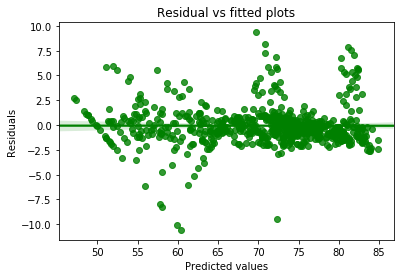

In [313]:
ax = sns.regplot(pred, residuals, color='g')
ax.set(xlabel='Predicted values', ylabel='Residuals', title='Residual vs fitted plots')
plt.show()

### Based on the residual plots, we can imply that other a few outliers, the model generated is good enough as the points are getting clustered towards the center. But we need to calculate some metrics in order to check that.

In [315]:
rmse = mean_squared_error(y_test, pred)**(0.5)
print('Root mean squared error: ', rmse)
print('r_square: ',model.rsquared)

Root mean squared error:  1.9712905408197974
r_square:  0.9597551412622525


#### But R_squred has an issue of value increasing when more variables are added. This can cause a problem during model model comparison. Therefore, we will calculate adjusted R_squared as well.

In [316]:
print("Adjusted R_square: ", model.rsquared_adj)

Adjusted R_square:  0.9543819234402201


#### Adjusted R_square value looks pretty good for the model.

In [317]:
scores = []
scores.append({"Model": "Multiple Linear Regression", "R_square": model.rsquared, "Root Mean_square": rmse,
               "Adjusted R_square": model.rsquared_adj})

### Ridge Regression

In [318]:
'''
lambda values for both ridge and losso regression.
Both of them will be cross-validated over 1000 values.
'''
n_alphas = 100
alphas = np.logspace(-7, 0.5, n_alphas)

In [319]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

3.1622776601683795

#### We see that the best alpha value coming out of cross validation is 3.1622776601683795. Now we will put that into our model.

In [320]:
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
rmse = mean_squared_error(y_test, pred)**(0.5)
print('Root mean squared error: ', rmse)
r_2 = r2_score(y_test, pred)
print('r_square: ',r_2)
adj_r2 = 1-(1-r_2)*((len(X_test)-1)/(len(X_test-len(X_test[0])-1)))
print("Adjusted R_square: ", adj_r2)

Root mean squared error:  1.9709194473676155
r_square:  0.9502823160220765
Adjusted R_square:  0.9503512725879266


In [321]:
scores.append({"Model": "Ridge Regression", "R_square": r_2, "Root Mean_square": rmse,
               "Adjusted R_square": adj_r2})

## Lasso Regression

In [322]:
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.00012766169490574075

#### We see that the best alpha value coming out of cross validation is 0.00012766169490574075. Now we will put that into our model.

In [323]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)
rmse = mean_squared_error(y_test, pred)**(0.5)
print('Root mean squared error: ',rmse )
r_2 = r2_score(y_test, pred)
print('r_square: ',r_2)
adj_r2 = 1-(1-r_2)*((len(X_test)-1)/(len(X_test-len(X_test[0])-1)))
print("Adjusted R_square: ", adj_r2)

Root mean squared error:  1.9709620928924825
r_square:  0.9502801644783698
Adjusted R_square:  0.9503491240283305


In [324]:
scores.append({"Model": "Lasso Regression", "R_square": r_2, "Root Mean_square": rmse,
               "Adjusted R_square": adj_r2})

## Decision Tree

In [325]:
parameters = {'min_samples_split':(5, 10, 15, 20, 25, 30, 35), 'min_samples_leaf':(2, 6, 10, 14, 18, 22, 26, 30),
             'max_features': ('auto', 'sqrt', 'log2')}
dtr = DecisionTreeRegressor()
d_reg = GridSearchCV(dtr, parameters)
d_reg.fit(X_train , y_train)
dtr_predict = d_reg.predict(X_test)
rmse = mean_squared_error(y_test, dtr_predict)**(0.5)
print('Root mean squared error: ',rmse )
r_2 = r2_score(y_test, dtr_predict)
print('r_square: ',r_2)
adj_r2 = 1-(1-r_2)*((len(X_test)-1)/(len(X_test-len(X_test[0])-1)))
print("Adjusted R_square: ", adj_r2)
scores.append({"Model": "Decision Tree", "R_square": r_2, "Root Mean_square": rmse, "Adjusted R_square": adj_r2})

Root mean squared error:  2.5501546761351017
r_square:  0.9167649613579626
Adjusted R_square:  0.9168804052395743


## Random Forest  

In [326]:
parameters = {'n_estimators': (20, 40, 60, 80 , 100), 'min_samples_split':(5, 10, 15, 20, 25, 30, 35), 'min_samples_leaf':(2, 6, 10, 14, 18, 22, 26, 30),
             'max_features': ('auto', 'sqrt', 'log2')}
rfr = RandomForestRegressor()
rf_reg = GridSearchCV(rfr, parameters)
rf_reg.fit(X_train , y_train)
rfr_predict = rf_reg.predict(X_test)
rmse = mean_squared_error(y_test, rfr_predict)**(0.5)
print('Root mean squared error: ',rmse )
r_2 = r2_score(y_test, rfr_predict)
print('r_square: ',r_2)
adj_r2 = 1-(1-r_2)*((len(X_test)-1)/(len(X_test-len(X_test[0])-1)))
print("Adjusted R_square: ", adj_r2)
scores.append({"Model": "Random Forest", "R_square": r_2, "Root Mean_square": rmse, "Adjusted R_square": adj_r2})

Root mean squared error:  1.8642404016761838
r_square:  0.9555187512026483
Adjusted R_square:  0.9555804450289969


In [327]:
Result_df = pd.DataFrame(scores)

In [328]:
Result_df

,Model,R_square,Root Mean_square,Adjusted R_square
0,Multiple Linear Regression,0.959755,1.971291,0.954382
1,Ridge Regression,0.950282,1.970919,0.950351
2,Lasso Regression,0.950280,1.970962,0.950349
3,Decision Tree,0.916765,2.550155,0.916880
4,Random Forest,0.955519,1.864240,0.955580


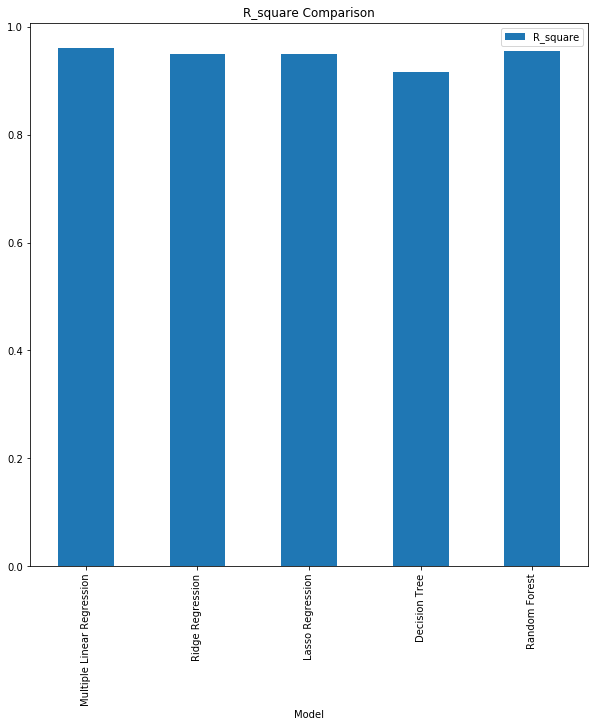

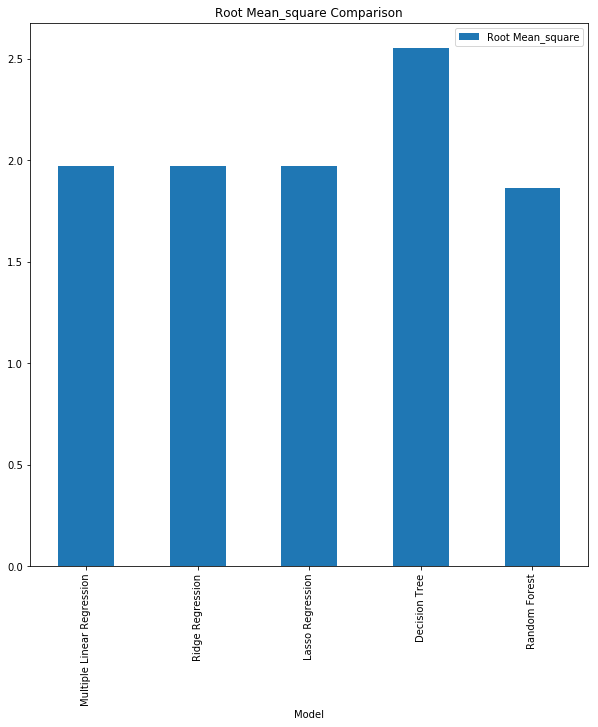

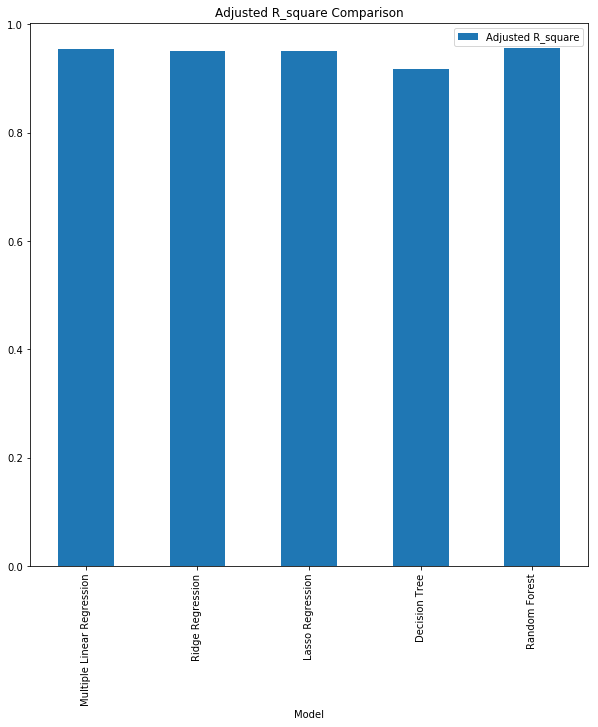

In [329]:
metrics = ['R_square', 'Root Mean_square', 'Adjusted R_square']
for i in metrics:
    Result_df.plot(x='Model', y=i, kind='bar', figsize=(10,10), title=i+' Comparison')

### From the plots, we cannot see much difference in the metric scores since all of them perform near about same, but we can check from the table. Decision Tree which is performing the worst of all, escpecially based on RMSE.


### Random Forest has come out to be best model in case of prediction. But if we are going for interpretability, we would go go for Multiple Linear Regression since the Lasso and Ridge didn't improve the performance worth that significance.